In [315]:
import numpy as np
import matplotlib.pyplot as plt

In [380]:
# TODO: object oriented

# K-armed stochastic bandit envirnment
class Environment:
    def __init__(self, k):
        self.k = k
        self.bandits = []
        for i in range(k):
            a = np.random.uniform(0, 1) 
            b = np.random.uniform(0, 1)
            self.bandits.append((a,b))
            
    def get_reward(self, arm):  # TODO: add diversity to distributions, and show prior evolutions...
        a, b = self.bandits[arm]
        return np.random.uniform(a,b)

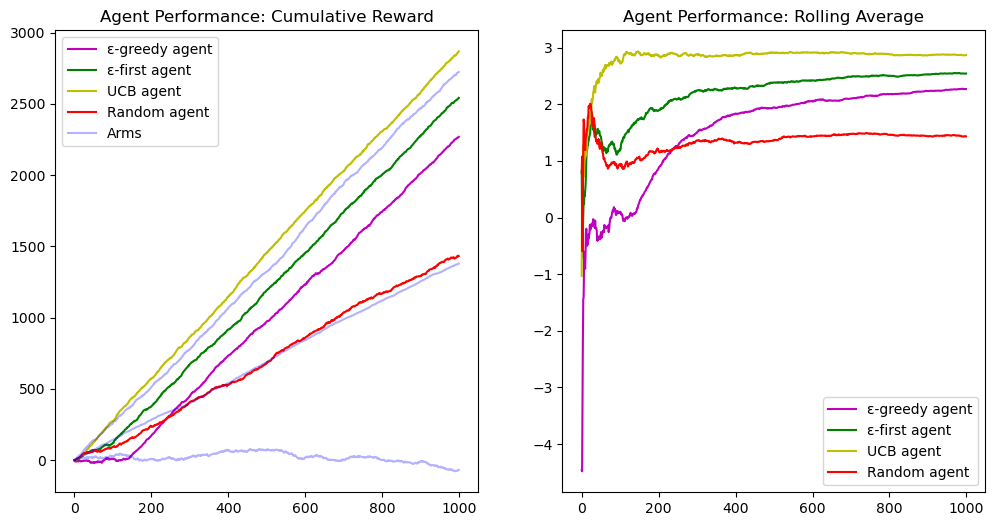

In [400]:
k = 3
N = 1000
epsilon = 0.1

# K-armed stochastic bandit envirnment
bandits = []
for i in range(k):
    a = np.random.uniform(-1, 3)
    b = np.random.uniform(0.5, 3)
    bandits.append((a,b))

def get_reward(arm):
        a, b = bandits[arm]
        return np.random.normal(a,b)

#-------------#
# Random agent
#-------------#

arm1_scores = [0]
arm2_scores = [0]
arm3_scores = [0]

for i in range(N):
    arm1_scores.append(get_reward(0) + arm1_scores[-1])
    arm2_scores.append(get_reward(1) + arm2_scores[-1])
    arm3_scores.append(get_reward(2) + arm3_scores[-1])

random_arm = [0]
random_rewards = []

for i in range(N):
    arm = np.random.randint(0, k)
    reward = get_reward(arm)
    random_rewards.append(reward)
    random_arm.append(reward + random_arm[-1])

#---------------#
# ε-first agent
#---------------#

epsilon_first = [0]
arm_history = {arm_index: [] for arm_index in range(len(bandits))}
first_rewards = []

for i in range(N):
    if i < (epsilon * N):
        arm = np.random.randint(0, k)
        reward = get_reward(arm)
        arm_history[arm].append(reward)
    else:
        curr_best_EV = 0
        curr_best_arm = 0
        for arm in range(k):
            EV = np.mean(arm_history[arm])
            if EV > curr_best_EV:
                curr_best_EV = EV
                curr_best_arm = arm
        reward = get_reward(curr_best_arm)
    first_rewards.append(reward)
    epsilon_first.append(reward + epsilon_first[-1])

#---------------#
# ε-greedy agent
#---------------#

epsilon_greedy = [0]
greedy_arm_history = {arm_index: [] for arm_index in range(len(bandits))}
greedy_rewards = []

for i in range(N):
    p = np.random.random()
    if p < epsilon:
        arm = np.random.randint(0,k)
        reward = get_reward(arm)
    else:
        curr_best_EV = 0
        curr_best_arm = 0
        for arm in range(k):
            if greedy_arm_history[arm]:
                EV = np.mean(greedy_arm_history[arm])
            else:
                EV = 0
            if EV > curr_best_EV:
                curr_best_EV = EV
                curr_best_arm = arm
        reward = get_reward(curr_best_arm)
    greedy_rewards.append(reward)
    greedy_arm_history[arm].append(reward)
    epsilon_greedy.append(reward + epsilon_greedy[-1])

#------------------------------------#
# UCB (upper confidence bound) agent
#------------------------------------#

arm_counts = [0 for i in range(k)]
arm_EV = [0 for i in range(k)]
UCB = [0]
UCB_rewards = []

for i in range(N):
    ucb_values = []
    for arm in range(k):
        if arm_counts[arm] > 0:
            EV = arm_EV[arm]
            confidence = np.sqrt(2 * np.log(i)) / arm_counts[arm]
            ucb_value = EV + confidence
        else:
            ucb_value = np.inf
        ucb_values.append(ucb_value)
    chosen_arm = np.argmax(ucb_values)
    reward = get_reward(chosen_arm)
    UCB_rewards.append(reward)
    UCB.append(reward + UCB[-1])
    arm_counts[chosen_arm] += 1
    arm_EV[chosen_arm] = ((arm_counts[chosen_arm] - 1) * arm_EV[chosen_arm] + reward) / arm_counts[chosen_arm]

#------------------------------#
# Evaluating agent performances
#------------------------------#

first_rolling_avg = []
greedy_rolling_avg = []
random_rolling_avg = []
UCB_rolling_avg = []

for i in range(N):
    first_rolling_avg.append(np.mean(first_rewards[:i+1]))
    greedy_rolling_avg.append(np.mean(greedy_rewards[:i+1]))
    random_rolling_avg.append(np.mean(random_rewards[:i+1]))
    UCB_rolling_avg.append(np.mean(UCB_rewards[:i+1]))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(epsilon_greedy, c="m", label="ε-greedy agent")
axs[0].plot(epsilon_first, c="g", label="ε-first agent")
axs[0].plot(UCB, c="y", label="UCB agent")
axs[0].plot(random_arm, c="r", label="Random agent")
axs[0].plot(arm1_scores, c="b", alpha=0.3, label="Arms")
axs[0].plot(arm2_scores, c="b", alpha=0.3)
axs[0].plot(arm3_scores, c="b", alpha=0.3)
axs[0].set_title("Agent Performance: Cumulative Reward")
axs[0].legend()
axs[1].plot(greedy_rolling_avg, c="m", label="ε-greedy agent")
axs[1].plot(first_rolling_avg, c="g", label="ε-first agent")
axs[1].plot(UCB_rolling_avg, c="y", label="UCB agent")
axs[1].plot(random_rolling_avg, c="r", label="Random agent")
axs[1].legend()
axs[1].set_title("Agent Performance: Rolling Average")
plt.show()